In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def scatter(X, y=None, title=None):
    """Scatter plot wrapper"""
    plt.figure(figsize=(10,10))
    if title is not None:
        plt.title(title, fontsize=24)
    plt.scatter(X[:,0], X[:,1], s=10., c=y, cmap='rainbow')

# VAE with Synthetic Data

주어진 synthetic data를 generation하는 VAE(Variational Auto-Encoder)을 만들어 봅시다.

### Synthetic Data

![data generator](./generator.png)

여기서 사용할 Synthetic Data는 원점을 중심으로하는 MoG(Mixture of Gaussians) 분포입니다.

상세히 말하면, MoG 분포를 따르는 2차원 데이터 변수 X는 Categorical 분포를 따르는 Latent variable Z에 의존적이며,

Z가 주어졌을때, X의 분포는 정규 분포를 따릅니다.

이 데이터를 만드는 함수는 다음과 같습니다.

In [2]:
def datagen(N=2**9, K=8):
    # latent variable
    z = np.random.choice(range(K), size=(N))
    
    # make labels
    y = z
    
    # make data points
    c_theta = (2 * np.pi / K) * y
    c_r = 8
    x = np.empty((N,2))
    x[:,0] = c_r * np.cos(c_theta) + np.random.randn(N)
    x[:,1] = c_r * np.sin(c_theta) + np.random.randn(N)
    
    return x, y

위 datagen 함수를 이용하여 데이터를 plot해 봅니다.

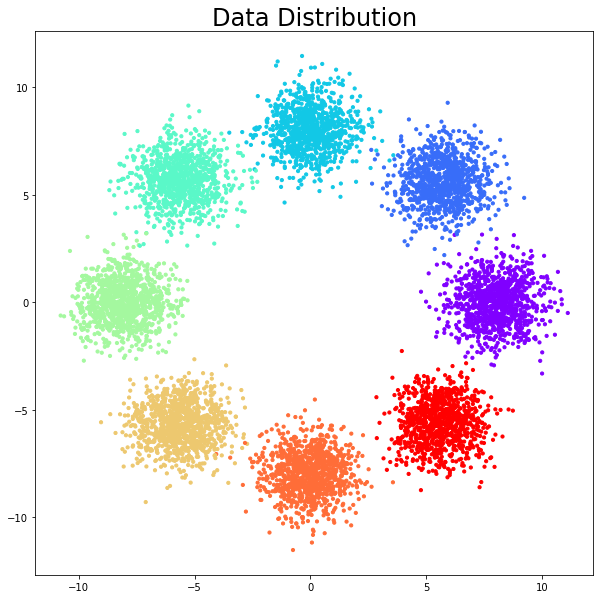

In [3]:
x, y = datagen(N=2**13)
scatter(x, y, 'Data Distribution')

### 문제

#### 기본 문제
기본 문제는 반드시 풀어야 합니다.
Pytorch로 작성된 Skeleton 코드가 주어지지만, 이를 사용하지 않고 다른 라이브러리(tensorflow나 numpy)를 사용하여도 무방합니다.
0. Synthetic Data를 Generation하는 VAE 모델을 만드세요.
    * 실제 latent variable은 discrete하지만, 문제를 쉽게하기 위해서 latent variable이 표준 정규분포를 따른다고 가정합니다.
    * Latent variable이 표준 정규분포를 따른다고 가정하면, latent 차원도 data 분포의 차원과 같이 2차원으로 두는 것이 구현에 용이합니다.
        * 즉, 일반적인 VAE를 학습하는 경우와 다르게 Dimension Reduction은 없습니다.
    * Reconstruction loss와 kl divergence를 모두 기록하세요.
    * Reconstruction한 결과를 plot 하세요.
    * Synthetic data를 encoding한 결과(approximate posterior)를 plot 하세요.
    * 표준 정규분포를 따르는 샘플들을 decoding한 결과를 plot 하세요.
    * 참고자료
        * [Variational Auto-Encoder for MNIST](https://github.com/hwalsuklee/tensorflow-mnist-VAE)
        * [Tutorial - What is a variational autoencoder?](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/)
        * [VARIATIONAL INFERENCE & DEEP LEARNING: A NEW SYNTHESIS - 2. VARIATIONAL AUTOENCODERS](https://www.dropbox.com/s/v6ua3d9yt44vgb3/cover_and_thesis.pdf?dl=1)

#### 추가 문제
추가 문제에 대해서는 추가 점수가 매겨지며, 반드시 풀 필요는 없습니다.
0. (Discussion) VAE의 encoding된 결과를 보면, 표준 정규분포와 다르게 원점을 중심으로 빈공간이 많이 있음을 확인할 수 있을겁니다(혹은 결과가 그렇지 않다면, 왜 그렇지 않은지 설명해주세요.). VAE의 encoding 결과가 정규 분포와 달라지면 달라질수록 모델의 generation 성능은 떨어질 수 밖에 없습니다. 이에 대한 원인과 해결 방법에 대해 논하세요.
    * 팁s
        * 모델에서 encoder의 output이 정규분포를 따른다고 가정하면, 빈공간이 생길 수 밖에 없다.
        * encoder의 output이 정규분포가 아닌 더 복잡한 분포를 따르도록 할 방법은?
        * encoder의 output이 정규분포를 따른다고 하더라도 빈공간이 보다 더 줄어들게 할 방법은?
        
    * 참고자료
        * [VARIATIONAL INFERENCE & DEEP LEARNING: A NEW SYNTHESIS - 2.9.2 Blurriness of generative model](https://www.dropbox.com/s/v6ua3d9yt44vgb3/cover_and_thesis.pdf?dl=1)
        * [Improved Variational Inference with Inverse Autoregressive Flow](https://arxiv.org/abs/1606.04934)
        * [Fixing a Broken ELBO](https://arxiv.org/abs/1711.00464)
        
0. (Real Latent Variable) 실제 latent variable이 categorical 분포를 따르는데 이를 사용하지 않은 이유는, discrete variable이 network가 미분 가능하지 않도록 만들기 때문입니다. Discrete latent variable을 두고도 뉴럴넷을 학습시키는 잘 알려진 방법은 "REINFORCE estimator"와 "Gumbel-Softmax Trick"이 있는데요, Discrete latent variable을 사용하는 모델을 만들고 위에서 언급한 둘 중 어느 하나를 선택하여 모델을 학습시키세요.
    * 팁s
        * REINFORCE estimator 보다는 Gumbel-Softmax Trick을 사용하기를 추천합니다.
            * Latent Variable 부분을 제외하고는 기본 문제 코드와 동일한 모델 구조, 학습 스케줄링을 써도 쉽게 학습이 됩니다.
            * Gumbel Softmax 구현 코드는 아래 링크에서 찾으실 수 있습니다.
                * Tensorflow: https://gist.github.com/ericjang/1001afd374c2c3b7752545ce6d9ed349#file-gumbel-softmax-py
                * Pytorch: https://discuss.pytorch.org/t/implement-gumbel-softmax-in-pytorch-0-3-version/18516
    * Reconstruction loss와 kl divergence를 모두 기록하세요.
    * Reconstruction한 결과를 plot 하세요.
    * Uniform한 Categorical 분포를 따르는 샘플들을 decoding한 결과를 plot 하세요.
    * 참고자료
        * [Tutorial: Categorical Variational Autoencoders using Gumbel-Softmax](https://blog.evjang.com/2016/11/tutorial-categorical-variational.html)
        * [The Gumbel-Softmax Trick for Inference of Discrete Variables](https://casmls.github.io/general/2017/02/01/GumbelSoftmax.html)
        * [VARIATIONAL INFERENCE & DEEP LEARNING: A NEW SYNTHESIS - 2.10.1 Score function estimator](https://www.dropbox.com/s/v6ua3d9yt44vgb3/cover_and_thesis.pdf?dl=1)

### 제출방법
* 전체 코드
* 훈련 과정 및 결과
* 간단한 설명 (2페이지 이내)

## Skeleton Code(Pytorch Implementation)

In [4]:
import torch
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import math

print("Pytorch Version: ", torch.__version__)

Pytorch Version:  0.3.0.post4


#### Model

In [5]:
class VAE_normal(nn.Module):
    def __init__(self, dim_inp=2, dim_hid=2**6, dim_lat=2, n_layer=4):
        super(VAE_normal, self).__init__()
        
        self.emb_enc = nn.Linear(dim_inp, dim_hid)
        self.lins_enc = nn.ModuleList([nn.Linear(dim_hid, dim_hid) for _ in range(n_layer)])
        self.proj_enc = nn.Linear(dim_hid, dim_lat * 2)
        
        self.emb_dec = nn.Linear(dim_lat, dim_hid)
        self.lins_dec = nn.ModuleList([nn.Linear(dim_hid, dim_hid) for _ in range(n_layer)])
        self.proj_dec = nn.Linear(dim_hid, dim_inp * 2)
        
        self.dim_inp = dim_inp
        self.dim_hid = dim_hid
        self.dim_lat = dim_lat
        self.n_layer = n_layer
        
    def forward(self, x):
        m, logs = self._encode(x)
        e = Variable(torch.zeros(m.data.size()).normal_())
        z = m + torch.exp(logs) * e
        x_m, x_logs = self._decode(z)
        return x_m, x_logs, z, m, logs
        
    def _encode(self, x):
        x = self.emb_enc(x)
        x = F.elu(x)
        for lin in self.lins_enc:
            x = lin(x)
            x = F.elu(x)
        
        stats = self.proj_enc(x)
        mus = stats[:,:self.dim_lat]
        log_sigmas = stats[:,self.dim_lat:]
        
        return mus, log_sigmas
    
    def _decode(self, x):
        x = self.emb_dec(x)
        x = F.elu(x)
        for lin in self.lins_dec:
            x = lin(x)
            x = F.elu(x)
            
        stats = self.proj_dec(x)
        mus = stats[:,:self.dim_inp]
        log_sigmas = stats[:,self.dim_inp:]
        log_sigmas = log_sigmas * 0 # Fix variance for stability
        
        return mus, log_sigmas
    
    def loss(self, x, x_m, x_logs, m, logs):
        marginal_likelihood = -.5 * torch.sum(math.log(math.pi * 2) + 2 * x_logs 
                                              + (x-x_m)**2 * torch.exp(-2*x_logs), 1)
        KL_divergence = 0.5 * torch.sum(m**2 + torch.exp(logs*2) - 2 * logs - 1, 1)

        marginal_likelihood = marginal_likelihood.mean()
        KL_divergence = KL_divergence.mean()

        ELBO = marginal_likelihood - KL_divergence

        loss = -ELBO
        
        return loss, marginal_likelihood, KL_divergence

#### Training

In [6]:
net_normal = VAE_normal()

optimizer = optim.Adam(net_normal.parameters(), lr=.001)

In [7]:
epochs = 6000
for i in range(epochs):
    optimizer.zero_grad()
    x, y = datagen(N=2**9)
    train_data = Variable(torch.FloatTensor(x))
    x_m, x_logs, z, m, logs = net_normal(train_data)
    loss, marginal_likelihood, KL_divergence = net_normal.loss(train_data, x_m, x_logs, m, logs)
    loss.backward()
    optimizer.step()
    
    print('%5d: %.5f\t %.5f\t %.5f' % (i, loss.data.cpu().numpy(), marginal_likelihood.data.cpu().numpy(), KL_divergence.data.cpu().numpy()), end='\r')
   

#### Plots

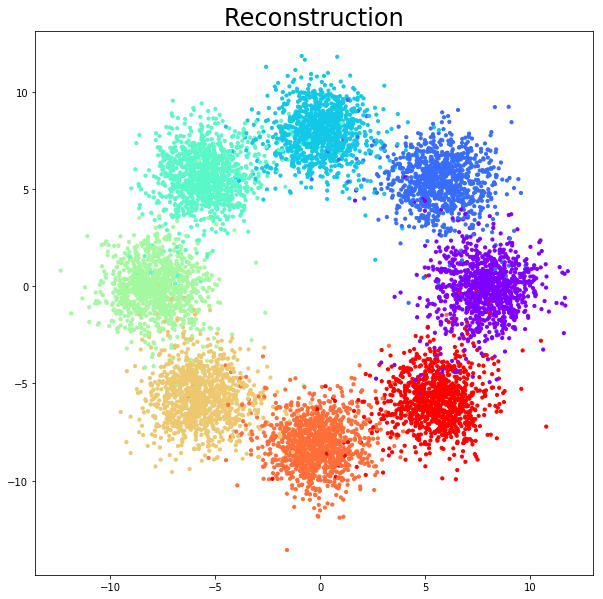

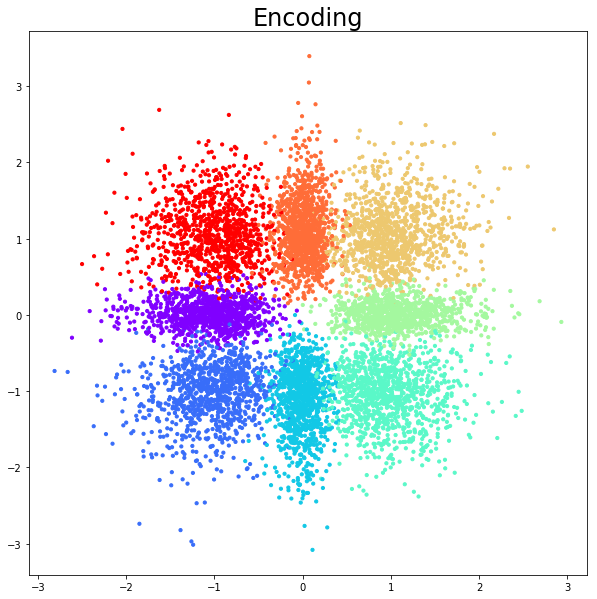

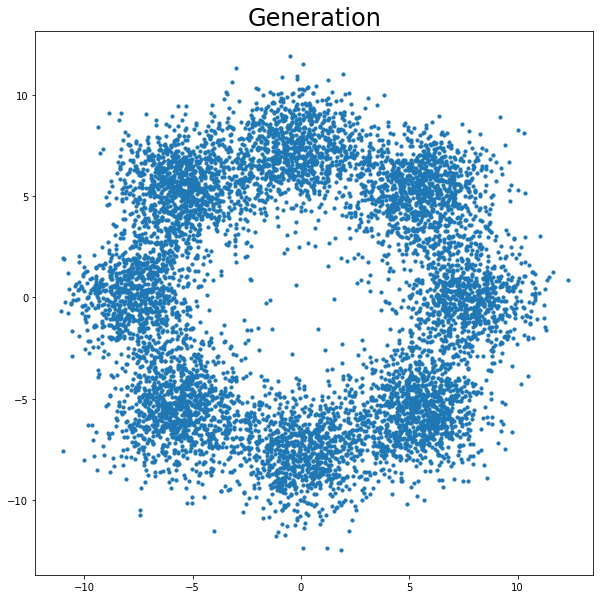

In [8]:
x, y = datagen(N=2**13)
test_data = Variable(torch.FloatTensor(x))

x_m, x_logs, z, m, logs = net_normal(test_data)

scatter((x_m + torch.exp(x_logs)*Variable(torch.zeros(x_m.data.size()).normal_())).data.numpy(), y, title="Reconstruction")
scatter(z.data.numpy(), y, title="Encoding")

x_m, x_logs = net_normal._decode(Variable(torch.zeros(m.data.size()).normal_()))
scatter((x_m + torch.exp(x_logs)*Variable(torch.zeros(x_m.data.size()).normal_())).data.numpy(), title="Generation")

## Additional Problem 1

encoder의 output이 따르는 분포가 $q(z|x)$라고 하자.

* 원인:
        Generation 성능이 높으려면 q(z|x)가 충분히 유연(복잡)해서 낮은 reconstruction loss를 유지하고 q(z)는 p(z)와 유사해져야 한다.
        그러나, q(z|x)가 충분히 유연하지 못하여 q(z) = p(z)가 되지 않기 때문에 generation 성능이 떨어지는 것이다.

* 해결방법:
        Normalizing Flow 혹은 Inverse Autoregressive Flow와 같은 방법을 써서 q(z|x)가 충분히 유연하도록 만든다.
        혹은 q(z|x)가 (유연하지 못한) 정규분포를 따른다고 하더라도 kl divergence와 reconstruction loss의 비율을 일대일로 두는 것이 아니라, kl divergence 비율을 점점 높여보면서 q(z|x)가 p(z)에 가까워지도록 해서 generation이 가장 잘되는 지점을 찾는 것도 한 방법이다.
        
 
Tips
* 모델에서 encoder의 output이 정규분포를 따른다고 가정하면, 빈공간이 생길 수 밖에 없다.

        이상적인 q(z|x)는 결국 p(z|x)와 동일해지는 것이다. 그러나 p(z|x)가 정규분포가 아니므로, q(z|x)가 정규분포를 따른다면 언제나 실제 사후 분포 p(z|x)와 다를 수 밖에 없다. 즉, q(z)는 p(z)가 될 수 없고, 따라서 빈공간이 생기는 것이다. 번외로, 만약 빈공간이 거의 없다면, 그것은 reconstruction loss 보다 kl divergence를 낮추는 것이 훨씬 쉬워서 q(z|x)가 p(z)를 따라가기 때문일 것이다.
        
* encoder의 output이 정규분포가 아닌 더 복잡한 분포를 따르도록 할 방법은?
        
        q(z|x)가 더 복잡한 분포인 p(z|x)를 따라가기 위해서는 결국 더 유연한 표현력을 가져야하는데, Normalizing Flow 혹은 Inverse Autoregressive Flow와 같은 방법을 쓰면 이러한 표현력을 모델에게 줄 수 있다. 이 방법들은 공통적으로 복잡한 분포의 pdf가 단순한 분포의 pdf를 이용하여 tractable하게 되도록 만들어준다. 따라서 q(z|x)가 복잡한 분포이더라도 KL Divergence loss를 구하게 만들 수 있다.
        
* encoder의 output이 정규분포를 따른다고 하더라도 빈공간이 보다 더 줄어들게 할 방법은?

        q(z|x)의 표현력을 더 가해주지 않더라도 위 문제를 해결할 수 있다. reconstruction loss와 kl divergence의 비율을 일대일로 두지 않고 kl divergence의 비율을 높임에 따라 q(z|x)는 p(z)를 따라가게 되므로, 빈 공간이 줄어들게 된다. 그러나 이는 generation 성능이 떨어지는 문제를 야기할 수도 있다.
        

## Additional Problem 2

In [9]:
import torch
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import math

print("Pytorch Version: ", torch.__version__)

Pytorch Version:  0.3.0.post4


#### Model

In [10]:
"""Original Source Code: https://discuss.pytorch.org/t/implement-gumbel-softmax-in-pytorch-0-3-version/18516"""

def _sample_gumbel(shape, eps=1e-10, out=None):
    """
    Sample from Gumbel(0, 1)
    based on
    https://github.com/ericjang/gumbel-softmax/blob/3c8584924603869e90ca74ac20a6a03d99a91ef9/Categorical%20VAE.ipynb ,
    (MIT license)
    """
    U = out.resize_(shape).uniform_() if out is not None else torch.rand(shape)
    return - torch.log(eps - torch.log(U + eps))

def _gumbel_softmax_sample(logits, tau=1, eps=1e-10):
    """
    Draw a sample from the Gumbel-Softmax distribution
    based on
    https://github.com/ericjang/gumbel-softmax/blob/3c8584924603869e90ca74ac20a6a03d99a91ef9/Categorical%20VAE.ipynb
    (MIT license)
    """
    dims = logits.dim()
    gumbel_noise = Variable(_sample_gumbel(logits.size(), eps=eps, out=logits.data.new()))
    y = logits + gumbel_noise
    return F.softmax(y / tau, dims - 1)


def gumbel_softmax(logits, tau=0.8, hard=False, eps=1e-10):
    """
    Sample from the Gumbel-Softmax distribution and optionally discretize.
    Args:
      logits: `[batch_size, n_class]` unnormalized log-probs
      tau: non-negative scalar temperature
      hard: if ``True``, take `argmax`, but differentiate w.r.t. soft sample y
    Returns:
      [batch_size, n_class] sample from the Gumbel-Softmax distribution.
      If hard=True, then the returned sample will be one-hot, otherwise it will
      be a probability distribution that sums to 1 across classes
    Constraints:
    - this implementation only works on batch_size x num_features tensor for now
    based on
    https://github.com/ericjang/gumbel-softmax/blob/3c8584924603869e90ca74ac20a6a03d99a91ef9/Categorical%20VAE.ipynb ,
    (MIT license)
    """
    shape = logits.size()
    assert len(shape) == 2
    y_soft = _gumbel_softmax_sample(logits, tau=tau, eps=eps)
    if hard:
        _, k = y_soft.max(-1)
        # this bit is based on
        # https://discuss.pytorch.org/t/stop-gradients-for-st-gumbel-softmax/530/5
        y_hard = torch.zeros_like(logits).scatter_(-1, k.view(-1, 1), 1.0)
        # this cool bit of code achieves two things:
        # - makes the output value exactly one-hot (since we add then
        #   subtract y_soft value)
        # - makes the gradient equal to y_soft gradient (since we strip
        #   all other gradients)
        y = y_hard - y_soft.detach() + y_soft
    else:
        y = y_soft
    return y

In [44]:
class VAE_gs(nn.Module):
    """Gumbel-Softmax VAE"""
    def __init__(self, dim_inp=2, dim_hid=2**6, dim_lat=8, n_layer=4):
        super(VAE_gs, self).__init__()
        
        self.emb_enc = nn.Linear(dim_inp, dim_hid)
        self.lins_enc = nn.ModuleList([nn.Linear(dim_hid, dim_hid) for _ in range(n_layer)])
        self.proj_enc = nn.Linear(dim_hid, dim_lat)
        
        self.emb_dec = nn.Linear(dim_lat, dim_hid)
        self.lins_dec = nn.ModuleList([nn.Linear(dim_hid, dim_hid) for _ in range(n_layer)])
        self.proj_dec = nn.Linear(dim_hid, dim_inp * 2)
        
        self.dim_inp = dim_inp
        self.dim_hid = dim_hid
        self.dim_lat = dim_lat
        self.n_layer = n_layer
        
    def forward(self, x):
        z, logits = self._encode(x)
        x_m, x_logs = self._decode(z)
        return x_m, x_logs, z, logits
        
    def _encode(self, x):
        x = self.emb_enc(x)
        x = F.elu(x)
        for lin in self.lins_enc:
            x = lin(x)
            x = F.elu(x)
        
        logits = self.proj_enc(x)
        z = gumbel_softmax(logits, tau=.5, hard=False)
        
        return z, logits
    
    def _decode(self, z):
        x = self.emb_dec(z)
        x = F.elu(x)
        for lin in self.lins_dec:
            x = lin(x)
            x = F.elu(x)
            
        stats = self.proj_dec(x)
        mus = stats[:,:self.dim_inp]
        log_sigmas = stats[:,self.dim_inp:]
        log_sigmas = log_sigmas * 0 # Fix variance for stability
        
        return mus, log_sigmas
    
    def loss(self, x, x_m, x_logs, logits):
        marginal_likelihood = -.5 * torch.sum(math.log(math.pi * 2) + 2 * x_logs 
                                              + (x-x_m)**2 * torch.exp(-2*x_logs), 1)
        
        K = self.dim_lat
        q_y = F.softmax(logits)
        log_q_y = torch.log(q_y+1e-20)
        KL_divergence = q_y * (log_q_y - math.log(1.0 / self.dim_lat))
        KL_divergence = torch.sum(KL_divergence, 1)
        marginal_likelihood = marginal_likelihood.mean()
        KL_divergence = KL_divergence.mean()

        ELBO = marginal_likelihood - KL_divergence

        loss = -ELBO
        
        return loss, marginal_likelihood, KL_divergence

#### Training

In [48]:
net_gs = VAE_gs()
optimizer = optim.Adam(net_gs.parameters(), lr=.001)

In [49]:
epochs = 6000
for i in range(epochs):
    optimizer.zero_grad()
    x, y = datagen(N=2**9)
    train_data = Variable(torch.FloatTensor(x))
    x_m, x_logs, z, logits = net_gs(train_data)
    loss, marginal_likelihood, KL_divergence = net_gs.loss(train_data, x_m, x_logs, logits)
    loss.backward()
    optimizer.step()
    
    print('%5d: %.5f\t %.5f\t %.5f' % (i, loss.data.cpu().numpy(), marginal_likelihood.data.cpu().numpy(), KL_divergence.data.cpu().numpy()), end='\r')
   

/Users/jay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


#### Plots

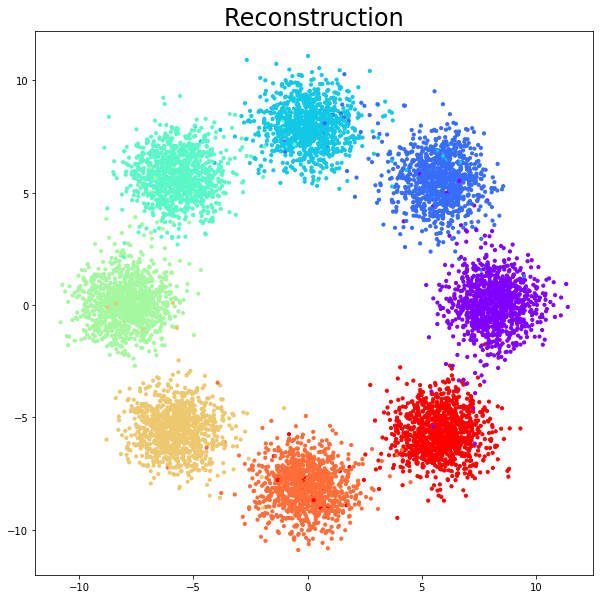

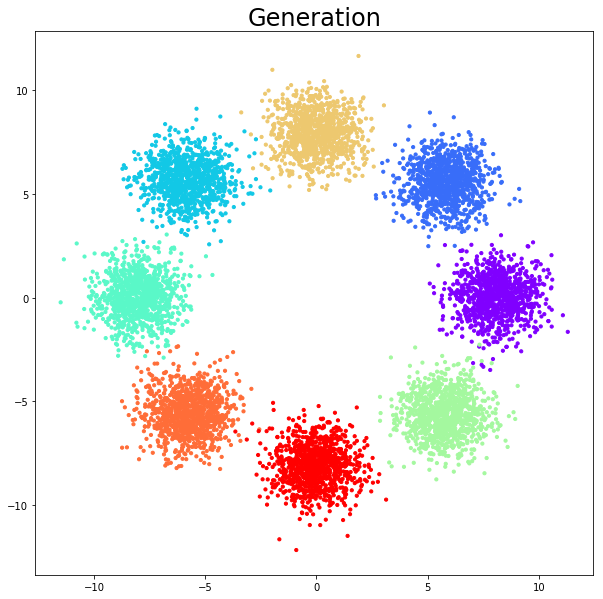

In [50]:
x, y = datagen(N=2**13)
test_data = Variable(torch.FloatTensor(x))

x_m, x_logs, z, logits = net_gs(test_data)

scatter((x_m + torch.exp(x_logs)*Variable(torch.zeros(x_m.data.size()).normal_())).data.numpy(), y, title="Reconstruction")

K = z.shape[-1]
z = np.tile(np.eye(K)[np.arange(K)], [(2**13) // K, 1])
y = np.tile(np.arange(K), (2**13) // K)
x_m, x_logs = net_gs._decode(Variable(torch.FloatTensor(z)))
scatter((x_m + torch.exp(x_logs)*Variable(torch.zeros(x_m.data.size()).normal_())).data.numpy(), y, title="Generation")